In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

# List of dataset file paths
dataset_files = [
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY 50.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY 100.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY 200.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY BANK.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY COMMODITIES.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY CPSE.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY INDIA CONSUMPTION.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY INFRASTRUCTURE.csv",
    "C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY IT.csv"
]

# Dictionary to store the loaded datasets
datasets = {}

# Load each dataset into a DataFrame
for file_path in dataset_files:
    try:
        # Use the file name (without path and extension) as the key for the dictionary
        dataset_key = os.path.basename(file_path).replace(".csv", "").replace(" ", "_")
        datasets[dataset_key] = pd.read_csv(file_path)
        print(f"Loaded dataset: {file_path}")
    except Exception as e:
        print(f"Error loading dataset {file_path}: {e}")


Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY 50.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY 100.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY 200.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY BANK.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY COMMODITIES.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY CPSE.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY INDIA CONSUMPTION.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY INFRASTRUCTURE.csv
Loaded dataset: C:/Users/AJITHA REDDY/Downloads/NSE/DATA FOR ANALYSIS/NIFTY IT.csv


NIFTY 50

In [4]:
# Load the dataset
data = pd.read_csv('NIFTY 50.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,10441.70,10441.90,10341.90,10380.45,359340403.0,18111.88
1,2018-11-02,10462.30,10606.95,10457.70,10553.00,434175607.0,21758.80
2,2018-11-05,10558.75,10558.80,10477.00,10524.00,311176379.0,14761.17
3,2018-11-06,10552.00,10600.25,10491.45,10530.00,309878810.0,14006.19
4,2018-11-07,10614.45,10616.45,10582.30,10598.40,32194181.0,1534.08


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,10441.70,10441.90,10341.90,10380.45,359340403.0,18111.88,0.148889
1,2018-11-02,10462.30,10606.95,10457.70,10553.00,434175607.0,21758.80,0.158163
2,2018-11-05,10558.75,10558.80,10477.00,10524.00,311176379.0,14761.17,0.156604
3,2018-11-06,10552.00,10600.25,10491.45,10530.00,309878810.0,14006.19,0.156927
4,2018-11-07,10614.45,10616.45,10582.30,10598.40,32194181.0,1534.08,0.160603


In [6]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - loss: 0.0384 - val_loss: 0.0242
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0016 - val_loss: 4.1518e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0013 - val_loss: 7.5673e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0014 - val_loss: 3.6366e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0013 - val_loss: 6.1059e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0012 - val_loss: 3.9857e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0012 - val_loss: 6.3863e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━

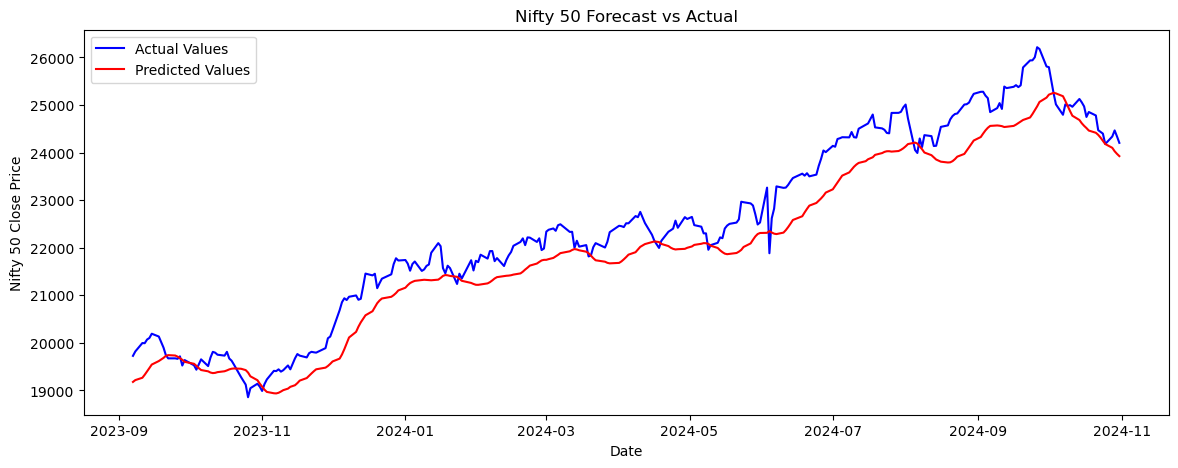

,Date,Predicted_Close
0,2023-09-07,19178.857422
1,2023-09-08,19217.468750
2,2023-09-11,19266.314453
3,2023-09-12,19329.613281
4,2023-09-13,19398.365234


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty 50 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty 50 Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - loss: 0.0544 - val_loss: 2.5594e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0027 - val_loss: 2.1270e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0013 - val_loss: 3.2448e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0015 - val_loss: 6.9332e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0017 - val_loss: 1.9393e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0012 - val_loss: 3.4892e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0016 - val_loss: 1.8545e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0015 - val_loss: 1.7542e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0014 - val_loss: 3.2549e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0013 - val_loss: 7.9170e-04
Epoch 12/100
29/2

In [8]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.0009778725216165185
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Root Mean Squared Error: 581.8208744626447


In [9]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━

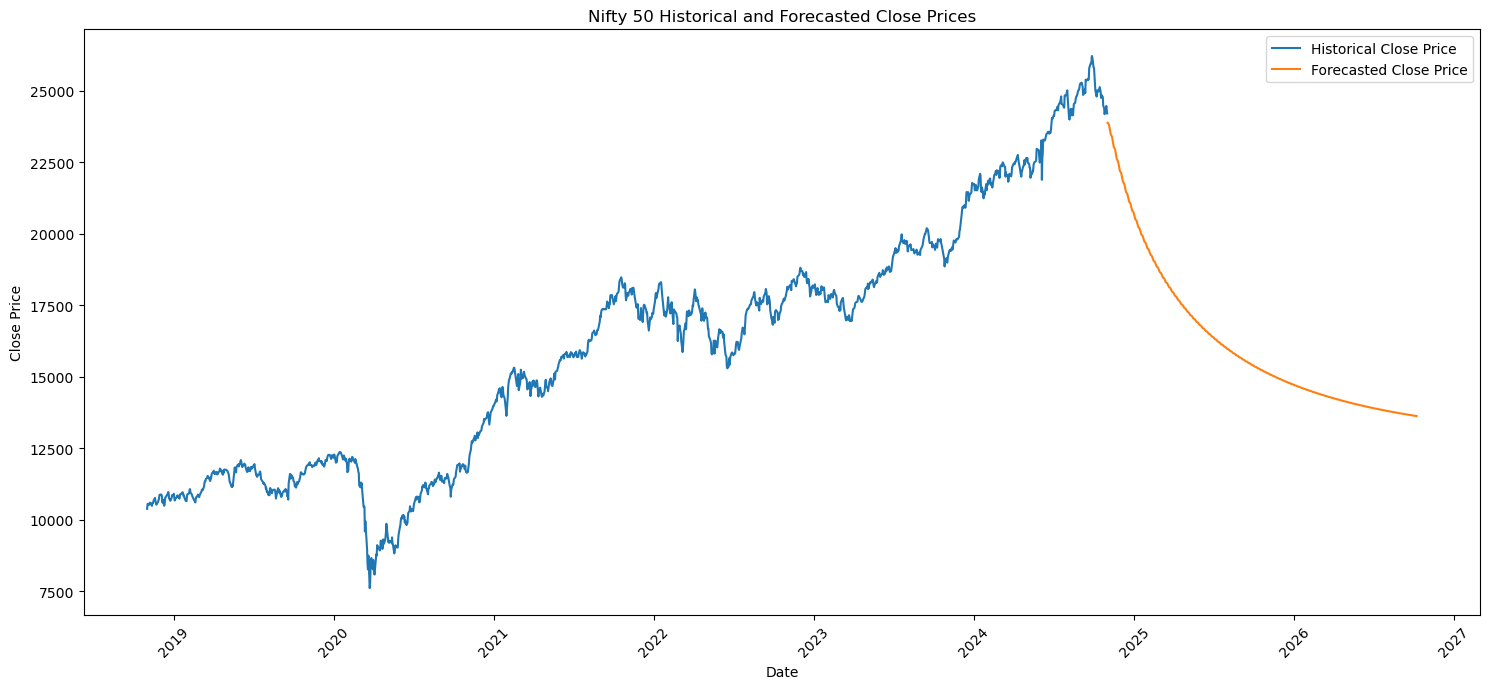

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty 50 Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY 100

In [25]:
data = pd.read_csv('NIFTY 100.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,10660.50,10660.7,10567.45,10607.60,566850800.0,23536.42
1,2018-11-02,10691.15,10841.7,10686.20,10782.30,656037238.0,26756.42
2,2018-11-05,10786.65,10789.2,10708.85,10761.00,470065486.0,18340.01
3,2018-11-06,10790.10,10836.4,10717.30,10758.45,438807073.0,17037.56
4,2018-11-07,10842.95,10845.5,10812.80,10828.85,49597981.0,1961.87


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,10660.50,10660.7,10567.45,10607.60,566850800.0,23536.42,0.147847
1,2018-11-02,10691.15,10841.7,10686.20,10782.30,656037238.0,26756.42,0.156788
2,2018-11-05,10786.65,10789.2,10708.85,10761.00,470065486.0,18340.01,0.155698
3,2018-11-06,10790.10,10836.4,10717.30,10758.45,438807073.0,17037.56,0.155568
4,2018-11-07,10842.95,10845.5,10812.80,10828.85,49597981.0,1961.87,0.159171


In [17]:
# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.0325 - val_loss: 0.0133
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0018 - val_loss: 4.9665e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0015 - val_loss: 9.7565e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0014 - val_loss: 4.0841e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0013 - val_loss: 5.0255e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0010 - val_loss: 3.7855e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 9.6653e-04 - val_loss: 0.0011
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 9.6553e-04 - val_loss: 6.5636e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 8.0391e-04 - val_loss: 0.0029
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 9.1719e-04 - val_loss: 7.6439e-04
Epoch 12/20
36/36 ━━━━━━━━━━

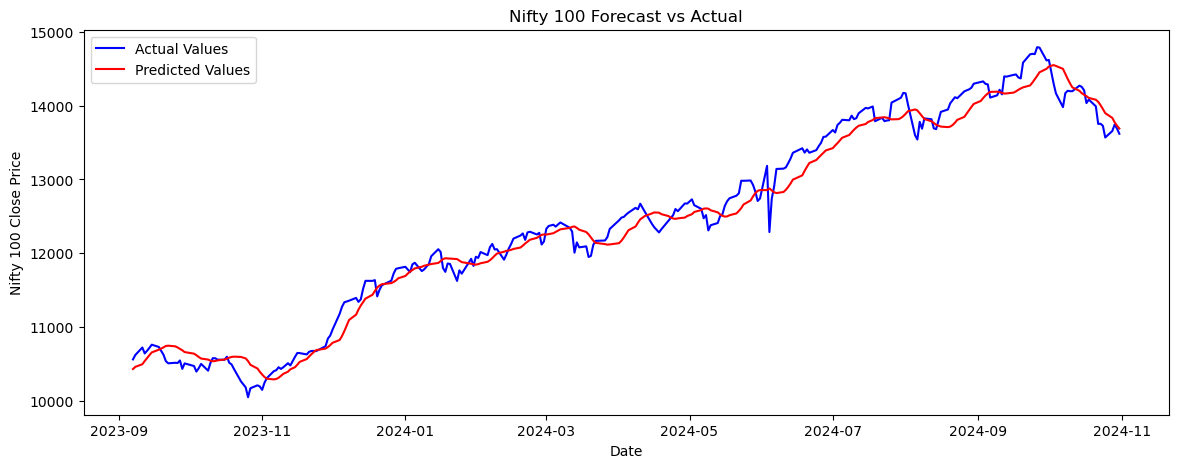

,Date,Predicted_Close
0,2023-09-07,10433.665039
1,2023-09-08,10463.433594
2,2023-09-11,10498.937500
3,2023-09-12,10542.672852
4,2023-09-13,10583.281250


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty 100 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty 100 Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0364 - val_loss: 7.9140e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0024 - val_loss: 3.7115e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0014 - val_loss: 1.9153e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0014 - val_loss: 2.7774e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0014 - val_loss: 2.3115e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0013 - val_loss: 3.3276e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0012 - val_loss: 1.8757e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0011 - val_loss: 2.9305e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0011 - val_loss: 2.1961e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0011 - val_loss: 2.1541e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 9.9670e-04 - val_loss: 1.6369e-04
Epoch 12/100
29/

In [20]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.0004893544828519225
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
Root Mean Squared Error: 432.18829683002576


In [21]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━

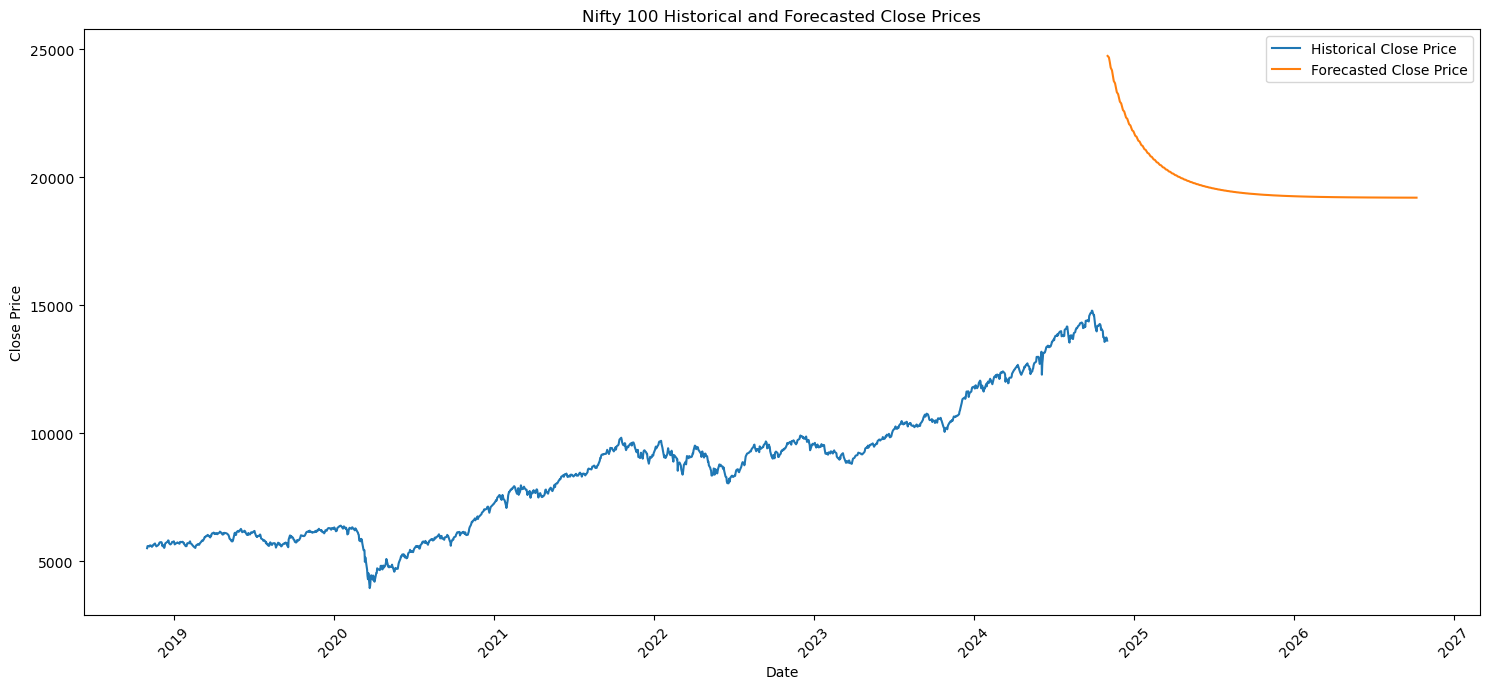

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty 100 Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY 200

In [34]:
# Load the dataset
data = pd.read_csv('NIFTY 200.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,5526.50,5526.55,5486.00,5505.55,9.861944e+08,31319.93
1,2018-11-02,5550.05,5622.50,5547.30,5588.75,1.214752e+09,35537.83
2,2018-11-05,5590.00,5595.60,5550.65,5576.40,8.965385e+08,24739.62
3,2018-11-06,5591.25,5613.40,5551.60,5571.50,7.688168e+08,23339.40
4,2018-11-07,5615.35,5616.50,5600.20,5608.75,1.017379e+08,2879.85


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,5526.50,5526.55,5486.00,5505.55,9.861944e+08,31319.93,0.143920
1,2018-11-02,5550.05,5622.50,5547.30,5588.75,1.214752e+09,35537.83,0.151592
2,2018-11-05,5590.00,5595.60,5550.65,5576.40,8.965385e+08,24739.62,0.150453
3,2018-11-06,5591.25,5613.40,5551.60,5571.50,7.688168e+08,23339.40,0.150002
4,2018-11-07,5615.35,5616.50,5600.20,5608.75,1.017379e+08,2879.85,0.153437


In [36]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1141, 60, 1), (286, 60, 1), (1141, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - loss: 0.0462 - val_loss: 0.0136
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0030 - val_loss: 9.2055e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0017 - val_loss: 6.5209e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0016 - val_loss: 4.5625e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0012 - val_loss: 8.7715e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0011 - val_loss: 6.6666e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0011 - val_loss: 4.0095e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0011 - val_loss: 3.9620e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0010 - val_loss: 4.0085e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 8.9269e-04 - val_loss: 3.9486e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━

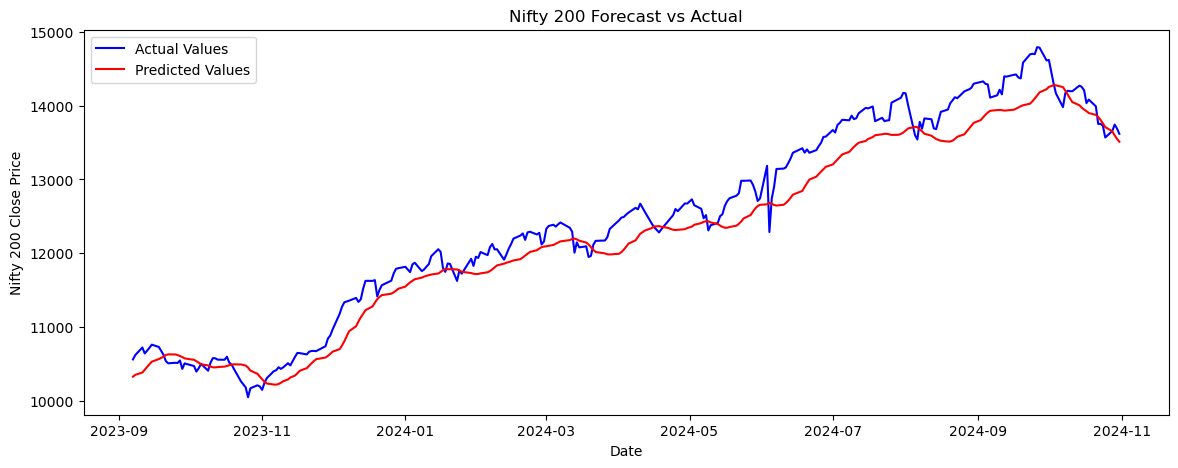

,Date,Predicted_Close
0,2023-09-07,10330.484375
1,2023-09-08,10355.892578
2,2023-09-11,10386.669922
3,2023-09-12,10424.781250
4,2023-09-13,10461.852539


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty 200 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty 200 Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - loss: 0.0346 - val_loss: 2.2107e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0025 - val_loss: 7.6018e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0014 - val_loss: 1.7139e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0015 - val_loss: 1.6053e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0013 - val_loss: 3.3814e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0010 - val_loss: 5.4751e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0012 - val_loss: 2.5367e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0011 - val_loss: 1.7724e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0013 - val_loss: 1.6575e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0012 - val_loss: 2.7493e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0012 - val_loss: 1.6488e-04
Epoch 12/100


In [39]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.0004347178037278354
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
Root Mean Squared Error: 226.10755197084214


In [40]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━

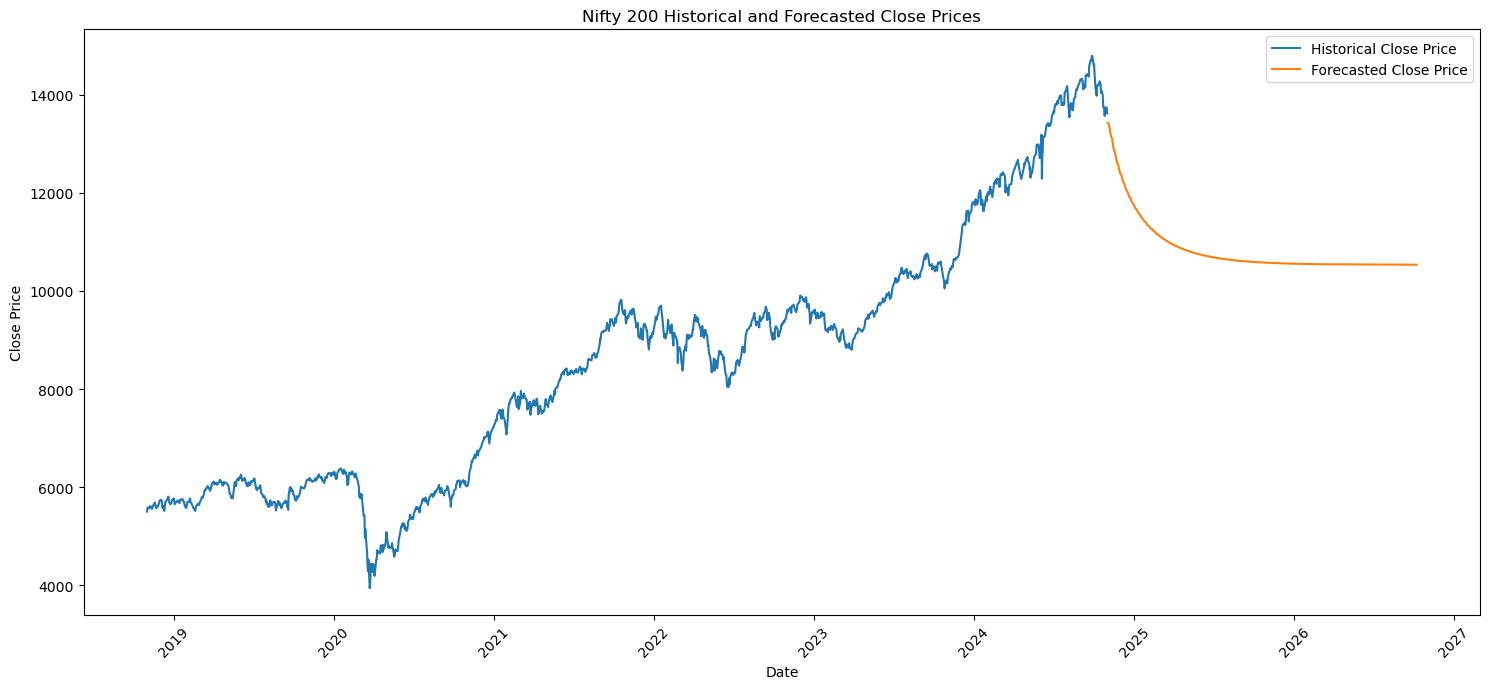

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty 200 Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY BANK

In [43]:
data = pd.read_csv('NIFTY BANK.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,25285.20,25401.60,25129.45,25323.65,216612149.0,6629.38
1,2018-11-02,25545.35,25856.25,25499.15,25701.65,297782501.0,7743.94
2,2018-11-05,25731.55,25788.20,25534.40,25732.20,188023500.0,5530.01
3,2018-11-06,25747.40,25860.75,25558.35,25598.00,162090341.0,5015.97
4,2018-11-07,25818.10,25824.40,25698.10,25737.50,18966564.0,498.12


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,25285.20,25401.60,25129.45,25323.65,216612149.0,6629.38,0.224413
1,2018-11-02,25545.35,25856.25,25499.15,25701.65,297782501.0,7743.94,0.234505
2,2018-11-05,25731.55,25788.20,25534.40,25732.20,188023500.0,5530.01,0.235320
3,2018-11-06,25747.40,25860.75,25558.35,25598.00,162090341.0,5015.97,0.231737
4,2018-11-07,25818.10,25824.40,25698.10,25737.50,18966564.0,498.12,0.235462


In [45]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - loss: 0.0571 - val_loss: 0.0124
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0042 - val_loss: 6.9889e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0027 - val_loss: 8.7913e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0025 - val_loss: 6.6168e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0021 - val_loss: 8.1793e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0020 - val_loss: 6.5433e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0017 - val_loss: 6.4432e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/s

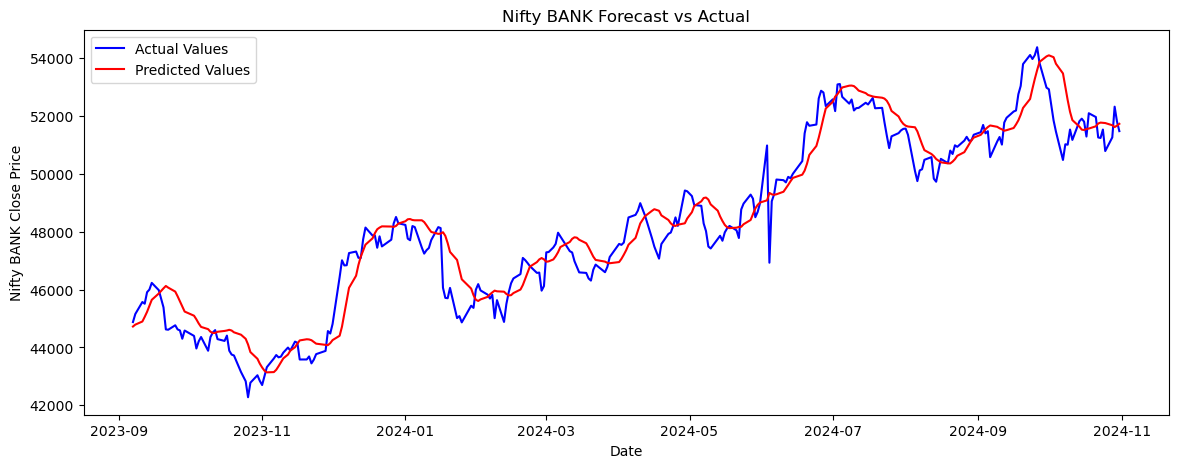

,Date,Predicted_Close
0,2023-09-07,44723.417969
1,2023-09-08,44789.679688
2,2023-09-11,44896.382812
3,2023-09-12,45057.316406
4,2023-09-13,45230.734375


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty BANK Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty BANK Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - loss: 0.0593 - val_loss: 0.0012
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0026 - val_loss: 4.9995e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0022 - val_loss: 5.6132e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0021 - val_loss: 6.8543e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0025 - val_loss: 3.5521e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0021 - val_loss: 6.4708e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0022 - val_loss: 5.4110e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0021 - val_loss: 3.7465e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0022 - val_loss: 3.5266e-04
Epoch 12/100
29/29 ━━━━

In [48]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.0005842131795361638
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
Root Mean Squared Error: 905.371601941769


In [49]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━

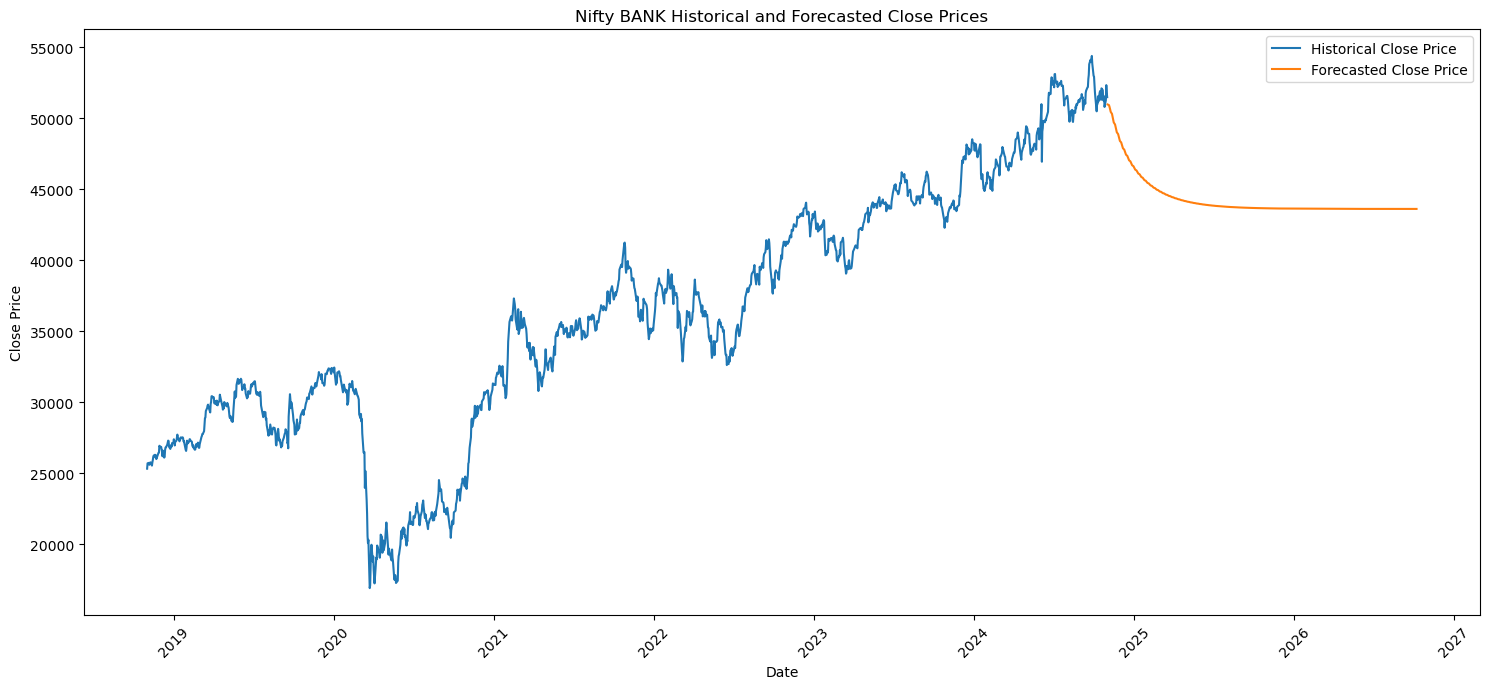

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty BANK Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY IT

In [52]:
# Load the dataset
data = pd.read_csv('NIFTY IT.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,14991.60,14991.60,14541.20,14622.00,41081207.0,1896.80
1,2018-11-02,14639.05,14780.10,14356.10,14396.70,70436201.0,1979.84
2,2018-11-05,14377.50,14534.05,14345.25,14471.75,48190914.0,1580.31
3,2018-11-06,14499.80,14660.15,14468.25,14577.30,43542715.0,1441.60
4,2018-11-07,14654.25,14698.95,14645.05,14674.45,34924680.0,286.20


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,14991.60,14991.60,14541.20,14622.00,41081207.0,1896.80,0.376858
1,2018-11-02,14639.05,14780.10,14356.10,14396.70,70436201.0,1979.84,0.364749
2,2018-11-05,14377.50,14534.05,14345.25,14471.75,48190914.0,1580.31,0.368783
3,2018-11-06,14499.80,14660.15,14468.25,14577.30,43542715.0,1441.60,0.374456
4,2018-11-07,14654.25,14698.95,14645.05,14674.45,34924680.0,286.20,0.379677


In [54]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.0849 - val_loss: 0.0064
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0028 - val_loss: 8.0694e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0024 - val_loss: 5.3782e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0023 - val_loss: 6.8737e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0018 - val_loss: 8.2987e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0017 - val_loss: 5.4949e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0019 - val_loss: 4.9865e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0013 - val_loss: 3.7160e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0014 - val_loss: 8.1880e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5

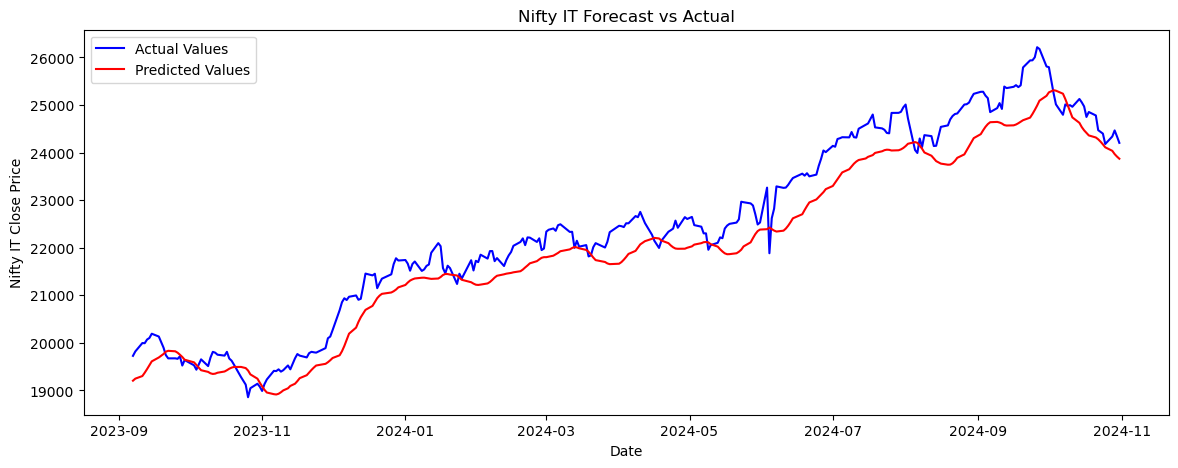

,Date,Predicted_Close
0,2023-09-07,19204.912109
1,2023-09-08,19247.986328
2,2023-09-11,19302.369141
3,2023-09-12,19372.041016
4,2023-09-13,19448.537109


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty IT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty IT Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [56]:
 from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - loss: 0.0555 - val_loss: 5.5619e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0024 - val_loss: 9.5608e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0018 - val_loss: 3.1881e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0019 - val_loss: 1.8754e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0017 - val_loss: 2.4304e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0018 - val_loss: 6.4483e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0016 - val_loss: 1.5824e-04
Epoch 12/100
29/29

In [57]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━

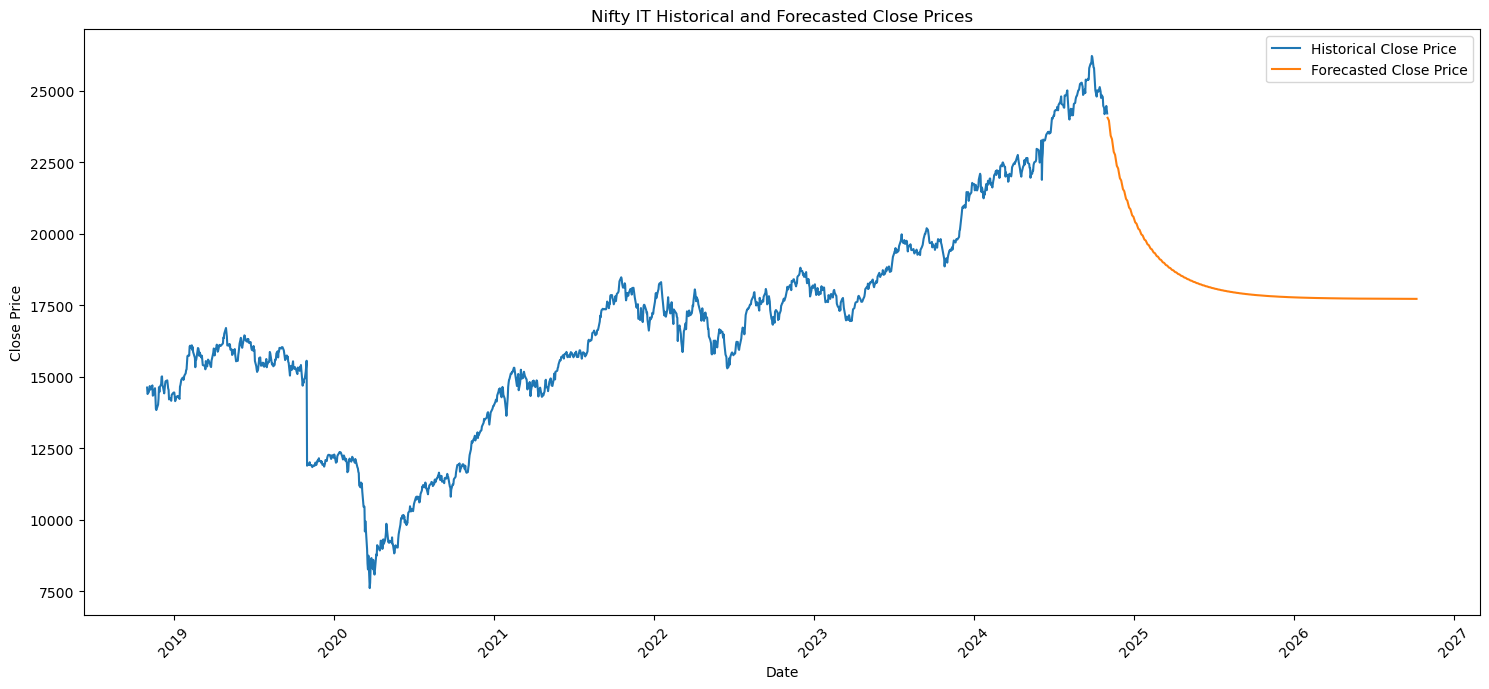

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty IT Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY CPSE

In [60]:
# Load the dataset
data = pd.read_csv('NIFTY CPSE.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,2155.20,2167.45,2144.35,2150.70,79440619.0,1022.76
1,2018-11-02,2171.45,2197.65,2168.50,2179.05,108489011.0,1850.19
2,2018-11-05,2190.60,2190.60,2134.40,2142.50,80115080.0,1064.44
3,2018-11-06,2150.00,2151.25,2134.15,2146.45,68282850.0,846.34
4,2018-11-07,2161.85,2162.75,2157.10,2160.15,7693704.0,89.65


In [61]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,2155.20,2167.45,2144.35,2150.70,79440619.0,1022.76,0.151672
1,2018-11-02,2171.45,2197.65,2168.50,2179.05,108489011.0,1850.19,0.156047
2,2018-11-05,2190.60,2190.60,2134.40,2142.50,80115080.0,1064.44,0.150407
3,2018-11-06,2150.00,2151.25,2134.15,2146.45,68282850.0,846.34,0.151016
4,2018-11-07,2161.85,2162.75,2157.10,2160.15,7693704.0,89.65,0.153130


In [62]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.0124 - val_loss: 0.0087
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 6.4537e-04 - val_loss: 0.0013
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 3.3404e-04 - val_loss: 0.0025
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 3.4352e-04 - val_loss: 0.0024
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 3.1769e-04 - val_loss: 0.0044
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 2.9504e-04 - val_loss: 0.0085
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 3.1379e-04 - val_loss: 0.0036
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 2.4712e-04 - val_loss: 0.0011
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 2.1672e-04 - val_loss: 0.0020
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.1872e-04 - val_loss: 0.0032
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 2.2009e-04 - val_loss: 0.0024
Epoch 12/20
36/36 ━━━━━━━━━━━━━━

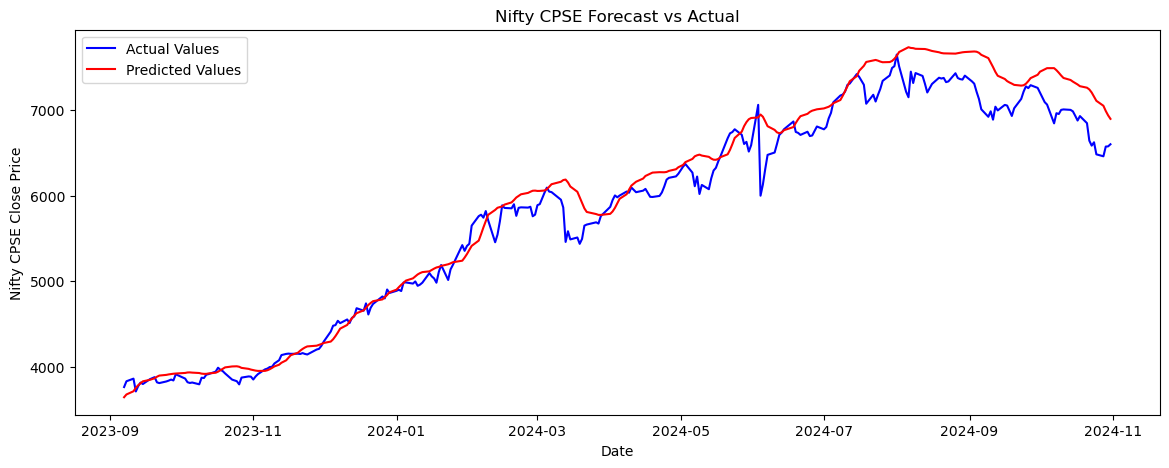

,Date,Predicted_Close
0,2023-09-07,3641.759277
1,2023-09-08,3673.926758
2,2023-09-11,3711.495361
3,2023-09-12,3752.372314
4,2023-09-13,3781.749268


In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty CPSE Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty CPSE Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 4.8449e-04 - val_loss: 4.9214e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 3.5647e-04 - val_loss: 2.0011e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 3.1189e-04 - val_loss: 1.4300e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 2.7562e-04 - val_loss: 8.6585e-05
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 2.4600e-04 - val_loss: 1.3765e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.1811e-04 - val_loss: 5.9488e-05
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 2.5747e-04 - val_loss: 1.3351e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 2.3218e-04 - val_loss: 1.1444e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 2.1997e-04 - val_loss: 9.0334e-05
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 2.3519e-04 - 

In [65]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.000668265507556498
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
Root Mean Squared Error: 167.51598928647925


In [66]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━

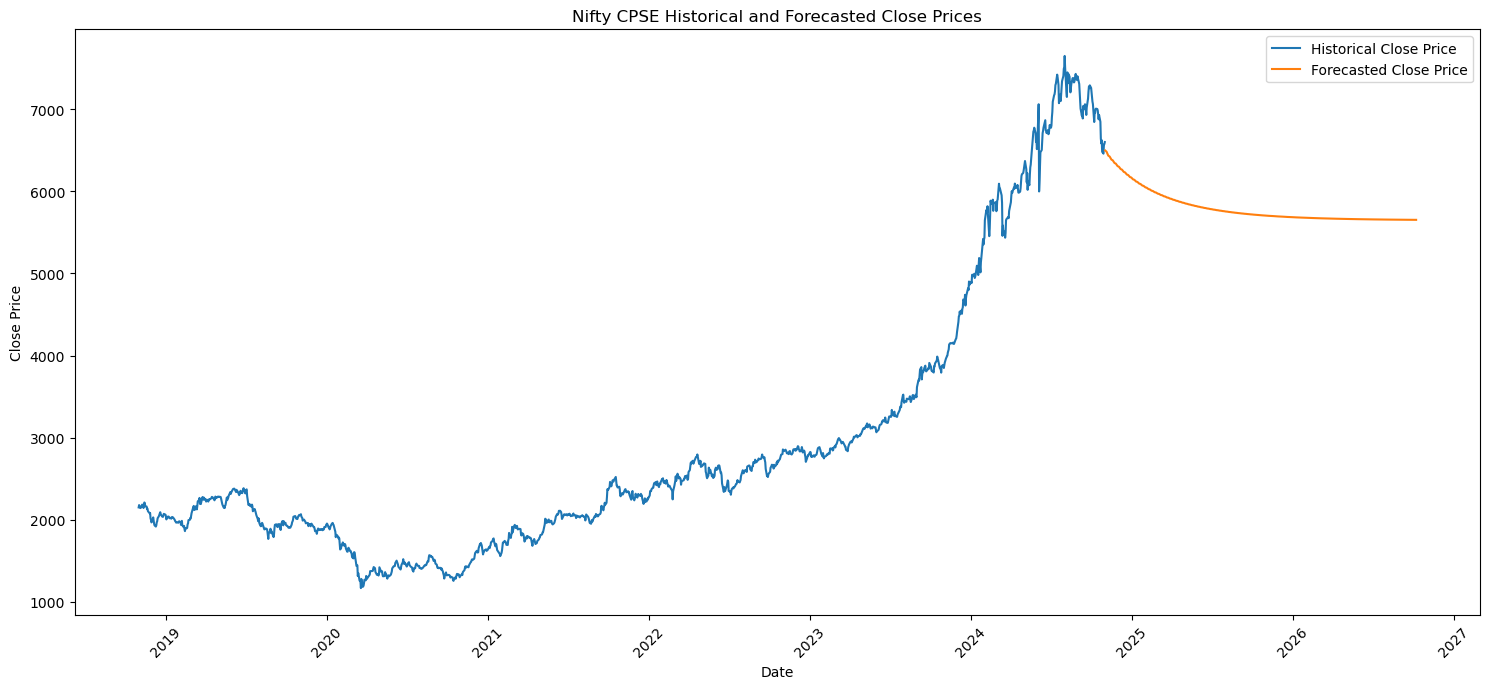

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty CPSE Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY INFRASTRUCTURE

In [69]:
# Load the dataset
data = pd.read_csv('NIFTY INFRASTRUCTURE.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,3006.05,3047.55,2994.80,3001.60,230943733.0,3189.67
1,2018-11-02,3025.50,3080.35,3024.40,3059.85,255955820.0,2398.58
2,2018-11-05,3053.90,3053.90,3013.60,3033.50,186077534.0,1779.86
3,2018-11-06,3038.80,3057.95,3033.65,3043.70,136630048.0,1653.20
4,2018-11-07,3065.95,3065.95,3050.15,3053.25,22492684.0,231.01


In [70]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,3006.05,3047.55,2994.80,3001.60,230943733.0,3189.67,0.117878
1,2018-11-02,3025.50,3080.35,3024.40,3059.85,255955820.0,2398.58,0.125561
2,2018-11-05,3053.90,3053.90,3013.60,3033.50,186077534.0,1779.86,0.122086
3,2018-11-06,3038.80,3057.95,3033.65,3043.70,136630048.0,1653.20,0.123431
4,2018-11-07,3065.95,3065.95,3050.15,3053.25,22492684.0,231.01,0.124691


In [71]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 0.0136 - val_loss: 0.0110
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0015 - val_loss: 7.1454e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.1505e-04 - val_loss: 9.0319e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.2260e-04 - val_loss: 6.2215e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.0335e-04 - val_loss: 5.7372e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.3358e-04 - val_loss: 7.1794e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.2257e-04 - val_loss: 8.2703e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 6.2157e-04 - val_loss: 5.9376e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 5.4776e-04 - val_loss: 8.7287e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.5997e-04 - val_loss: 9.5731e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.0229e-04 - val_loss: 5.2851e-0

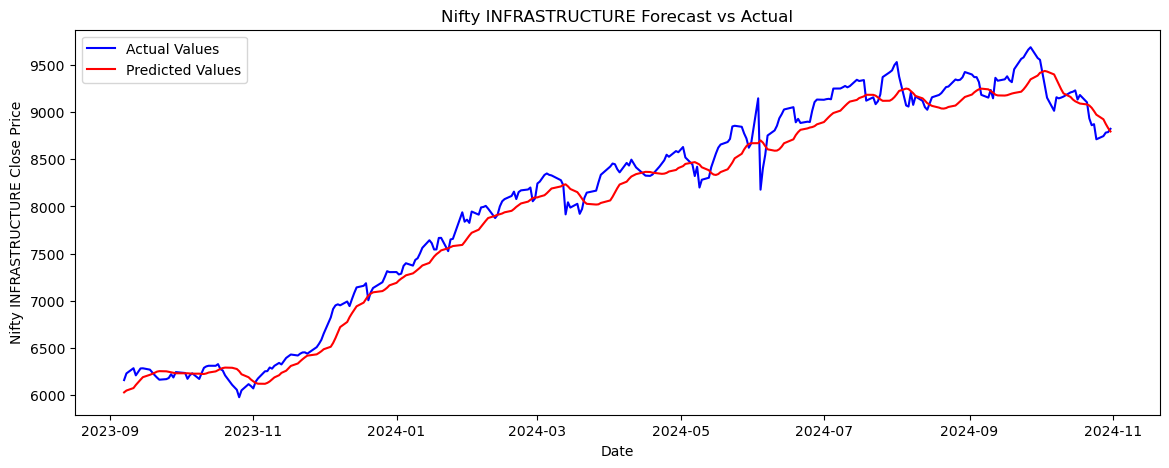

,Date,Predicted_Close
0,2023-09-07,6027.959473
1,2023-09-08,6047.425781
2,2023-09-11,6073.754395
3,2023-09-12,6106.450195
4,2023-09-13,6135.297363


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty INFRASTRUCTURE Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty INFRASTRUCTURE Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0141 - val_loss: 0.0027
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0013 - val_loss: 1.4489e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9.1734e-04 - val_loss: 1.7700e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.0181e-04 - val_loss: 1.3187e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.0139e-04 - val_loss: 1.9535e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.7139e-04 - val_loss: 1.4097e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.1807e-04 - val_loss: 3.2508e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 7.2607e-04 - val_loss: 1.8973e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.1763e-04 - val_loss: 1.1761e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.9425e-04 - val_loss: 3.1149e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.1233e-04 - val_loss:

In [74]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.000829534896183759
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Root Mean Squared Error: 218.34971888619822


In [75]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

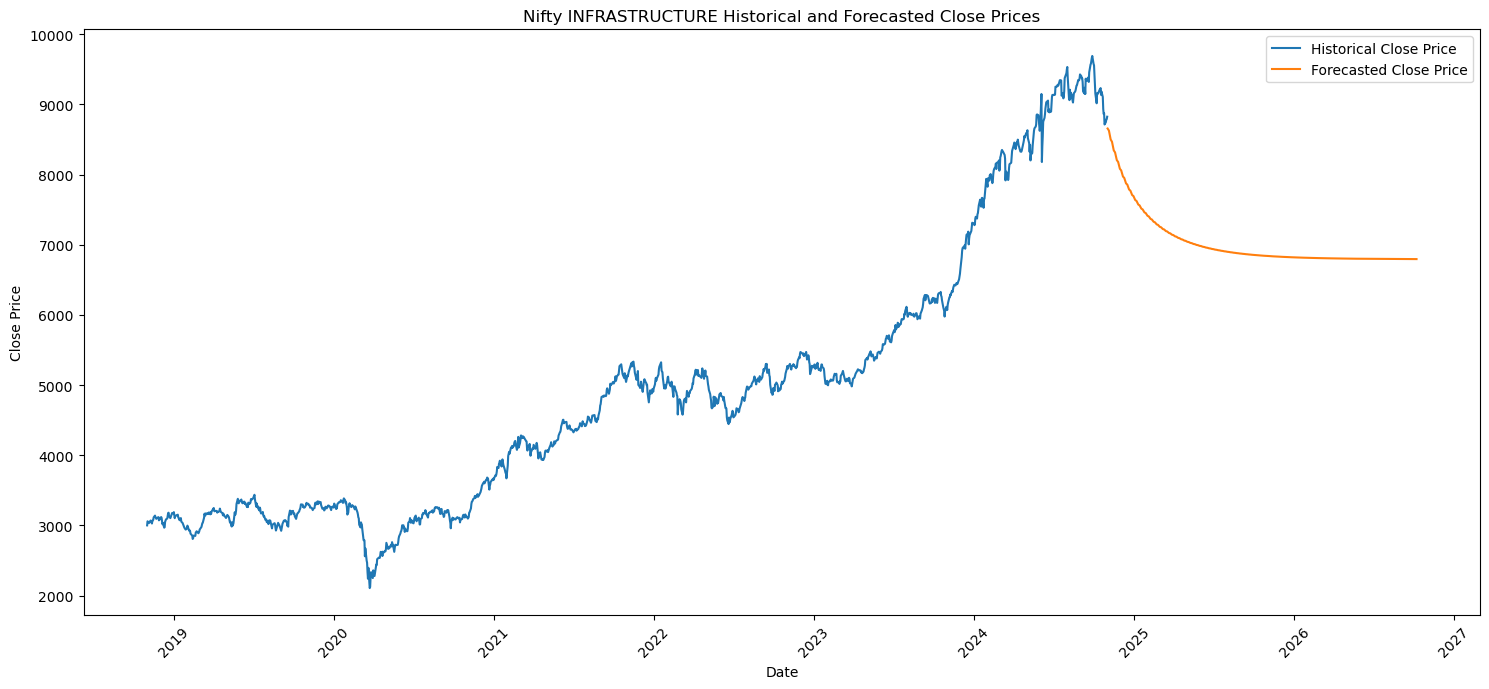

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty INFRASTRUCTURE Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY COMMODITIES

In [78]:
# Load the dataset
data = pd.read_csv('NIFTY COMMODITIES.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,3361.00,3390.60,3349.65,3381.85,143696871.0,4456.49
1,2018-11-02,3419.75,3490.60,3416.50,3469.60,242671459.0,7567.31
2,2018-11-05,3474.45,3474.45,3432.90,3460.40,149154138.0,3925.39
3,2018-11-06,3471.95,3482.95,3434.25,3453.85,117581111.0,3430.52
4,2018-11-07,3480.15,3482.65,3474.10,3479.55,14874571.0,474.28


In [79]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,3361.00,3390.60,3349.65,3381.85,143696871.0,4456.49,0.167131
1,2018-11-02,3419.75,3490.60,3416.50,3469.60,242671459.0,7567.31,0.178469
2,2018-11-05,3474.45,3474.45,3432.90,3460.40,149154138.0,3925.39,0.177280
3,2018-11-06,3471.95,3482.95,3434.25,3453.85,117581111.0,3430.52,0.176434
4,2018-11-07,3480.15,3482.65,3474.10,3479.55,14874571.0,474.28,0.179755


In [80]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0425 - val_loss: 0.0099
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019 - val_loss: 8.4645e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014 - val_loss: 6.4317e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0011 - val_loss: 6.8206e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.3696e-04 - val_loss: 0.0026
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.1919e-04 - val_loss: 0.0024
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.0852e-04 - val_loss: 0.0011
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/ste

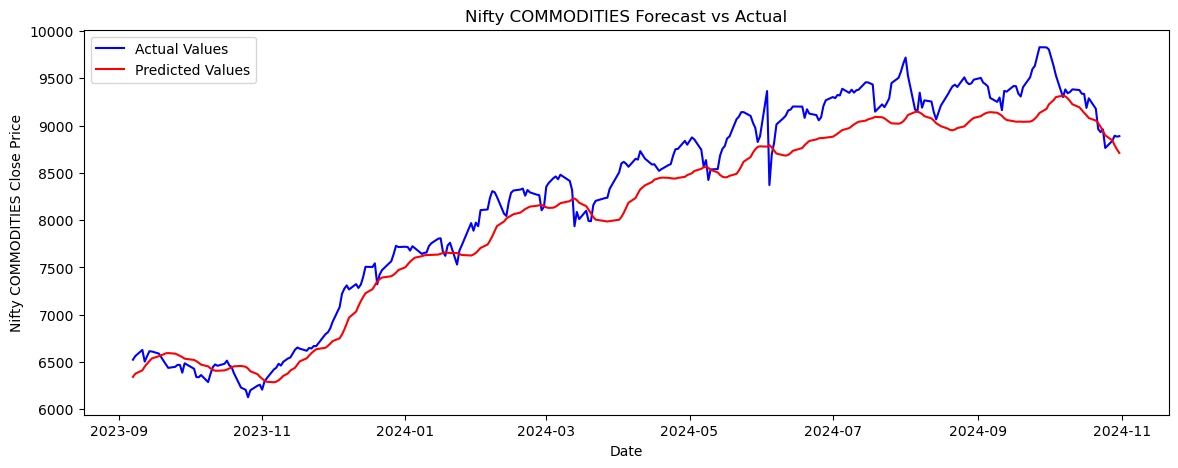

,Date,Predicted_Close
0,2023-09-07,6343.154785
1,2023-09-08,6376.922363
2,2023-09-11,6412.750977
3,2023-09-12,6451.513184
4,2023-09-13,6483.219727


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty COMMODITIES Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty COMMODITIES Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0371 - val_loss: 3.5232e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0025 - val_loss: 2.3495e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0016 - val_loss: 2.5276e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014 - val_loss: 2.1828e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0011 - val_loss: 2.7766e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0011 - val_loss: 2.4212e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0011 - val_loss: 2.8668e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0012 - val_loss: 7.6258e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0011 - val_loss: 7.1849e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0012 - val_loss: 2.1205e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.7533e-04 - val_loss: 3.1735e-04
Epoch 12/100
29

In [83]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.0016427247319370508
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Root Mean Squared Error: 313.6720163038575


In [84]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

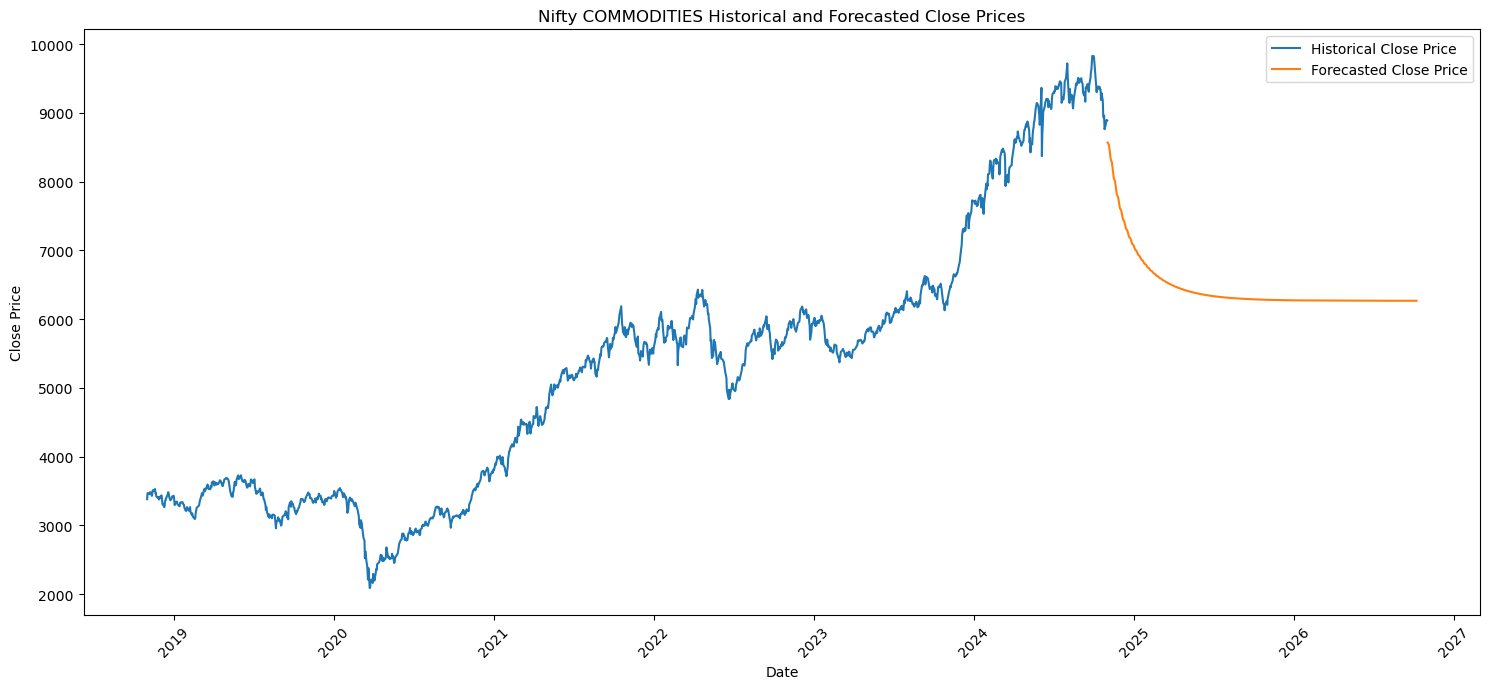

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty COMMODITIES Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977


NIFTY INDIA CONSUMPTION

In [87]:
# Load the dataset
data = pd.read_csv('NIFTY INDIA CONSUMPTION.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Filter the data for the date range Nov 1, 2018 - Oct 31, 2024
filtered_data = data[(data['Date'] >= '2018-11-01') & (data['Date'] <= '2024-10-31')]

# Display the first few rows of the cleaned dataset
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,2018-11-01,4608.70,4619.0,4569.20,4587.15,73181834.0,4029.39
1,2018-11-02,4627.15,4721.4,4626.45,4695.30,78548971.0,5289.87
2,2018-11-05,4698.05,4705.7,4661.70,4687.35,59988228.0,3183.03
3,2018-11-06,4705.30,4713.4,4644.40,4663.15,52804536.0,2813.04
4,2018-11-07,4703.90,4704.7,4690.60,4700.10,6603445.0,414.93


In [88]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any) by forward filling
filtered_data = filtered_data.ffill()

# Select the 'Close' column for normalization and modeling
close_prices = filtered_data[['Close']]

# Normalize the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized values back to the dataframe
filtered_data['Normalized_Close'] = normalized_close_prices

# Display the first few rows of the preprocessed data
filtered_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr),Normalized_Close
0,2018-11-01,4608.70,4619.0,4569.20,4587.15,73181834.0,4029.39,0.100258
1,2018-11-02,4627.15,4721.4,4626.45,4695.30,78548971.0,5289.87,0.111772
2,2018-11-05,4698.05,4705.7,4661.70,4687.35,59988228.0,3183.03,0.110925
3,2018-11-06,4705.30,4713.4,4644.40,4663.15,52804536.0,2813.04,0.108349
4,2018-11-07,4703.90,4704.7,4690.60,4700.10,6603445.0,414.93,0.112283


In [89]:
import numpy as np

# Define a function to create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
sequence_length = 60

# Create sequences and labels
sequences, labels = create_sequences(normalized_close_prices, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142, 60, 1), (286, 60, 1), (1142, 1), (286, 1))

Epoch 1/20


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0181 - val_loss: 0.0111
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0014 - val_loss: 4.9067e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 7.2032e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.6000e-04 - val_loss: 4.2578e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.3699e-04 - val_loss: 5.1283e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.0920e-04 - val_loss: 0.0011
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.8783e-04 - val_loss: 4.7533e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.2163e-04 - val_loss: 3.9529e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.8886e-04 - val_loss: 9.1144e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7123e-04 - val_loss: 3.6671e-04
Epoch 12/20
36

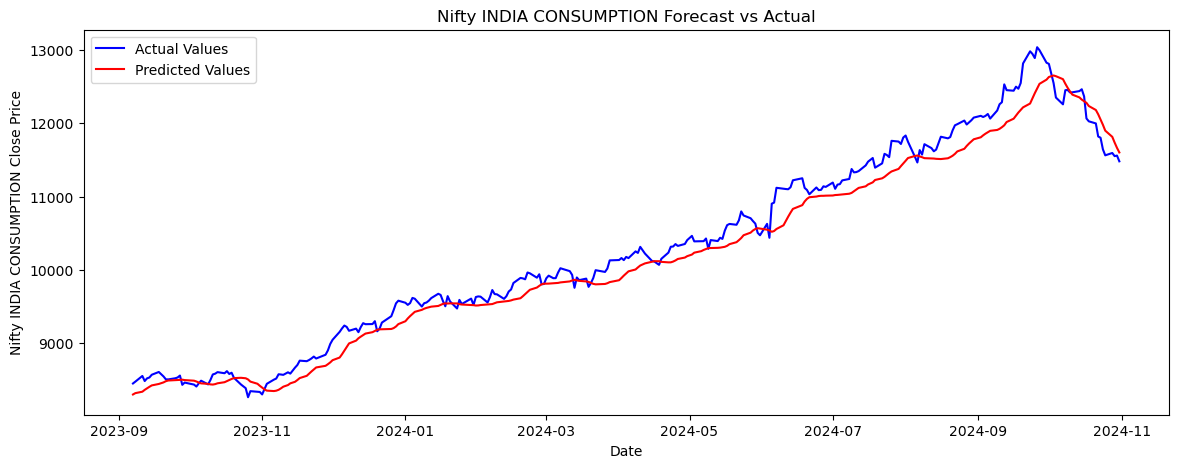

,Date,Predicted_Close
0,2023-09-07,8297.293945
1,2023-09-08,8315.548828
2,2023-09-11,8335.477539
3,2023-09-12,8360.648438
4,2023-09-13,8381.936523


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Design the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original and predicted values
plt.figure(figsize=(14, 5))
plt.plot(filtered_data['Date'][-len(y_test):], y_test_rescaled, label='Actual Values', color='blue')
plt.plot(filtered_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted Values', color='red')
plt.title('Nifty INDIA CONSUMPTION Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Nifty INDIA CONSUMPTION Close Price')
plt.legend()
plt.show()

# Output the predicted values with corresponding dates
predicted_values = pd.DataFrame({
    'Date': filtered_data['Date'][-len(y_test):].reset_index(drop=True),
    'Predicted_Close': y_pred_rescaled.flatten()
})
predicted_values.head()

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0219 - val_loss: 0.0018
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0013 - val_loss: 2.3564e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 7.7949e-04 - val_loss: 3.0354e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 7.9521e-04 - val_loss: 5.3508e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.6347e-04 - val_loss: 3.9229e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.5314e-04 - val_loss: 2.0097e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.6887e-04 - val_loss: 2.6091e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.0429e-04 - val_loss: 2.3336e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.4584e-04 - val_loss: 1.9599e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.1749e-04 - val_loss: 3.4585e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.7601e-04 - val_loss:

In [92]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_test_actual)**2))
print(f"Root Mean Squared Error: {rmse}")

Test Loss: 0.0003758246311917901
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Root Mean Squared Error: 182.09943221343053


In [93]:
# Prepare the last sequence from the training data
last_sequence = normalized_close_prices[-sequence_length:]

# Generate predictions for the next 2 years (approximately 504 trading days)
num_prediction_days = 504
predictions = []

for _ in range(num_prediction_days):
    # Reshape the last sequence for prediction
    current_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Make a prediction
    predicted_value = model.predict(current_sequence)[0][0]

    # Append the prediction to the list
    predictions.append(predicted_value)

    # Update the last sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

# Convert predictions to actual values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the predictions
last_date = filtered_data['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='B')

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Close': predicted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

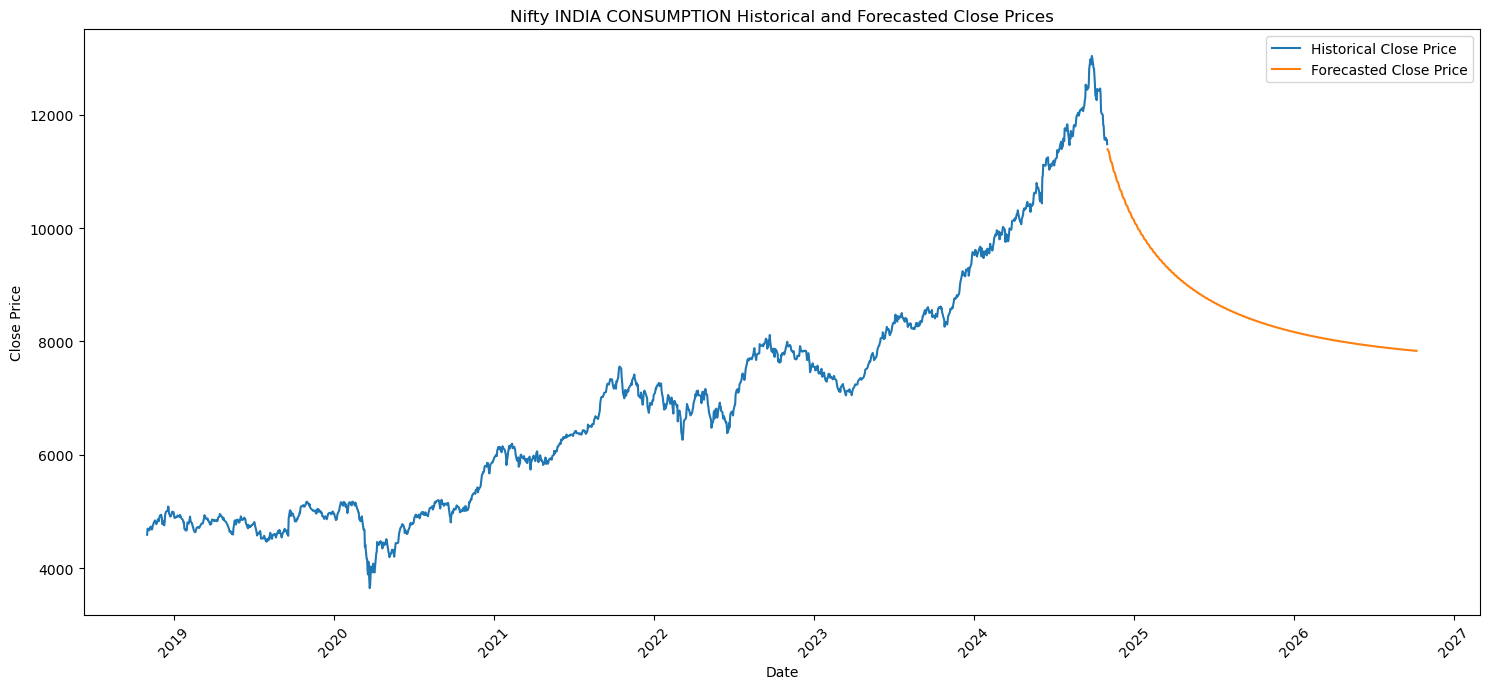

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecasted Close Price')
plt.title('Nifty INDIA CONSUMPTION Historical and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
print(forecast_df.head(10))
print(forecast_df.tail(10))

        Date  Predicted_Close
0 2024-11-01     23878.798828
1 2024-11-04     23814.482422
2 2024-11-05     23739.562500
3 2024-11-06     23657.869141
4 2024-11-07     23572.046875
5 2024-11-08     23483.859375
6 2024-11-11     23394.478516
7 2024-11-12     23304.677734
8 2024-11-13     23214.953125
9 2024-11-14     23125.634766
          Date  Predicted_Close
494 2026-09-24     13657.596680
495 2026-09-25     13654.099609
496 2026-09-28     13650.615234
497 2026-09-29     13647.143555
498 2026-09-30     13643.689453
499 2026-10-01     13640.247070
500 2026-10-02     13636.821289
501 2026-10-05     13633.409180
502 2026-10-06     13630.010742
503 2026-10-07     13626.625977
